# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/Users/josemanuelbustos/Desktop/cursos_udemy/python-ml-course-master/notebooks/datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

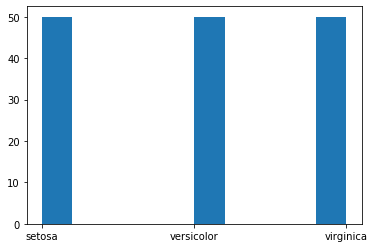

In [7]:
plt.hist(data.Species)

In [8]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [10]:
import numpy as np

In [11]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

In [13]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [16]:
preds = tree.predict(test[predictors])

In [17]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,15,0
virginica,0,1,16


## Cross Validation para la poda

In [28]:
X = data[predictors]
Y = data[target]

In [29]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

## Random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [46]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [47]:
forest.oob_score_

0.9533333333333334